In [1]:
import seaborn as sns
import datetime as dt
import yfinance as yf
from ta.volatility import BollingerBands
from sklearn.linear_model import LinearRegression

In [2]:
btc = yf.Ticker("BTC-USD")

# Train Dataset

In [3]:
trainStartDate = dt.datetime(2009,1,1)
trainEndDate = dt.datetime(2021,1,1)
btcTrain = btc.history(start=trainStartDate, end=trainEndDate)

trainBollinger = BollingerBands(close=btcTrain["Close"], window=20, window_dev=2)

btcTrain['bb_bbm'] = trainBollinger.bollinger_mavg()
btcTrain['bb_bbh'] = trainBollinger.bollinger_hband()
btcTrain['bb_bbl'] = trainBollinger.bollinger_lband()

closeTrainX = btcTrain[["Close"]]
trainBollingerY = btcTrain["bb_bbm"].dropna()
trainBollingerY_H = btcTrain["bb_bbh"].dropna()
trainBollingerY_L = btcTrain["bb_bbl"].dropna()

## Basit Lineer Regresyon

In [4]:
reg = LinearRegression()
regH = LinearRegression()
regL = LinearRegression()

model = reg.fit(closeTrainX[19:], trainBollingerY)
modelH = regH.fit(closeTrainX[19:], trainBollingerY_H)
modelL = regL.fit(closeTrainX[19:], trainBollingerY_L)

# Test Dataset

In [5]:
#prepare test
testStartDate = dt.datetime(2021,1,1)
testEndDate = dt.datetime(2022,1,1)
btcTest = btc.history(start=testStartDate, end=testEndDate)
testBollinger = BollingerBands(close=btcTest["Close"], window=20, window_dev=2)
btcTest['bb_bbm'] = testBollinger.bollinger_mavg()
btcTest['bb_bbh'] = testBollinger.bollinger_hband()
btcTest['bb_bbl'] = testBollinger.bollinger_lband()

## Test

In [6]:
testResults = []
testResultsH = []
testResultsL = []

for i in range(btcTest['bb_bbm'].dropna().size):
    testResults.append(model.predict([[(btcTest['bb_bbm'].dropna().iloc[i])]])[0])
    testResultsH.append(modelH.predict([[(btcTest['bb_bbh'].dropna().iloc[i])]])[0])
    testResultsL.append(modelL.predict([[(btcTest['bb_bbl'].dropna().iloc[i])]])[0])



## Görselleştirme

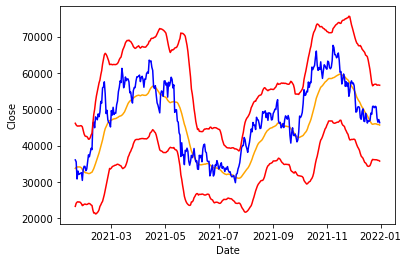

In [7]:
sns.lineplot(x = btcTest["Close"][19:].index, y = testResults, color = "orange")
sns.lineplot(x = btcTest["Close"][19:].index, y = btcTest["Close"][19:], color = "blue")
sns.lineplot(x = btcTest["Close"][19:].index, y = testResultsH, color = "red")
sns.lineplot(x = btcTest["Close"][19:].index, y = testResultsL, color = "red");

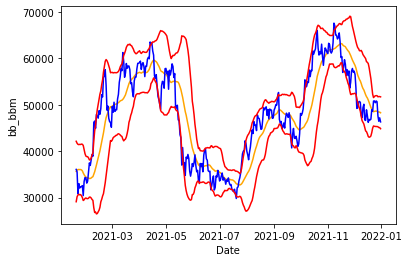

In [8]:
sns.lineplot(x = btcTest["Close"][19:].index, y = btcTest["bb_bbm"].dropna(), color = "orange")
sns.lineplot(x = btcTest["Close"][19:].index, y = btcTest["Close"][19:], color = "blue")
sns.lineplot(x = btcTest["Close"][19:].index, y = btcTest["bb_bbh"].dropna(), color = "red")
sns.lineplot(x = btcTest["Close"][19:].index, y = btcTest["bb_bbl"].dropna(), color = "red");

## Score

In [11]:
model.predict([[30]])

array([211.08311978])